# Final Project ML

In [1]:
#Step 1: Import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2:Data Loading
# Display settings for seaborn plots and extended pandas display
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)

# Loading data from CSV file
df = pd.read_csv("Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv")

# Print dataset size (number of rows and columns)
print(f"Dataset size: {df.shape}")

# View first 5 rows to get an overview of the data
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 150)         
pd.set_option('display.colheader_justify', 'enter') 
print(df.head())

# Display info about columns, data types, and missing values
print("\nDataset info:")
print(df.info())

# Check for missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset size: (1918715, 18)
   Year          Crash Descriptor   Time        Date Day of Week Police Report  Lighting Conditions Municipality Collision Type Descriptor  \
0  2019  Property Damage Accident   3:00  01/01/2019     Tuesday             Y  Dark-Road Unlighted        CHILI                     OTHER   
1  2019  Property Damage Accident  20:57  01/01/2019     Tuesday             Y  Dark-Road Unlighted    PITTSFORD                     OTHER   
2  2019           Injury Accident  13:20  02/03/2019      Sunday             Y             Daylight       QUEENS                     OTHER   
3  2019           Injury Accident  18:40  02/04/2019      Monday             Y    Dark-Road Lighted        BRONX                OVERTAKING   
4  2019  Property Damage Accident  14:37  02/01/2019      Friday             Y             Daylight       TUSTEN                     OTHER   

  County Name     Road Descriptor Weather Conditions Traffic Control Device Road Surface Conditions DOT Reference Marke

In [3]:
# Step 3:Processing of missing values and data preparation
# Fill missing values in Municipality with Unknown
df['Municipality'] = df['Municipality'].fillna('Unknown')

# Fill missing values in Traffic Control Device with Unknown
df['Traffic Control Device'] = df['Traffic Control Device'].fillna('Unknown')

# Fill missing values in DOT Reference Marker Location with Unknown
df['DOT Reference Marker Location'] = df['DOT Reference Marker Location'].fillna('Unknown')

# Check missing values count after filling
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Year                             0
Crash Descriptor                 0
Time                             0
Date                             0
Day of Week                      0
Police Report                    0
Lighting Conditions              0
Municipality                     0
Collision Type Descriptor        0
County Name                      0
Road Descriptor                  0
Weather Conditions               0
Traffic Control Device           0
Road Surface Conditions          0
DOT Reference Marker Location    0
Pedestrian Bicyclist Action      0
Event Descriptor                 0
Number of Vehicles Involved      0
dtype: int64


In [4]:
# Step 4:Converting and extending date and time functions
# The "Date" is specified in the date and time format.
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

#The'Time' is datetime.time type
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

#New column 'Hour' extracted from 'Time'
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

#Define a function to assign an hour to a time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#Apply the function to create a new "Time_of_Day" column
df['Time_of_Day'] = df['Hour'].apply(time_of_day)

#Display the appropriate columns for verification
print(df[['Date', 'Time', 'Day of Week', 'Year', 'Hour', 'Time_of_Day']].head())

        Date      Time Day of Week  Year  Hour Time_of_Day
0 2019-01-01  03:00:00     Tuesday  2019     3       Night
1 2019-01-01  20:57:00     Tuesday  2019    20     Evening
2 2019-02-03  13:20:00      Sunday  2019    13   Afternoon
3 2019-02-04  18:40:00      Monday  2019    18     Evening
4 2019-02-01  14:37:00      Friday  2019    14   Afternoon


In [14]:
## Next Steps will be EDA Analysis 
#1)Distribution by accident type(Crash Descriptor)
#2)Distribution of accidents by time of day(Hour and Day of the week)
#3)Distribution of accidents by weather conditions(Weather Conditions)
#4)Distribution of accidents by lighting conditions(Lighting Conditions)
#5)Distribution of accident severity depending on the weather
#6)Distribution of accident severity depending  Lighting Conditions
#7)Number of Vehicles Involved and comparison by accident type
#8)Distribution of accidents by Municipality (Top 10 by crash count)
#9)Distribution of accidents by Collision Type Descriptor
#10)Distribution of accidents by Event Descriptor
#11)Distribution of accidents by Road Surface Conditions

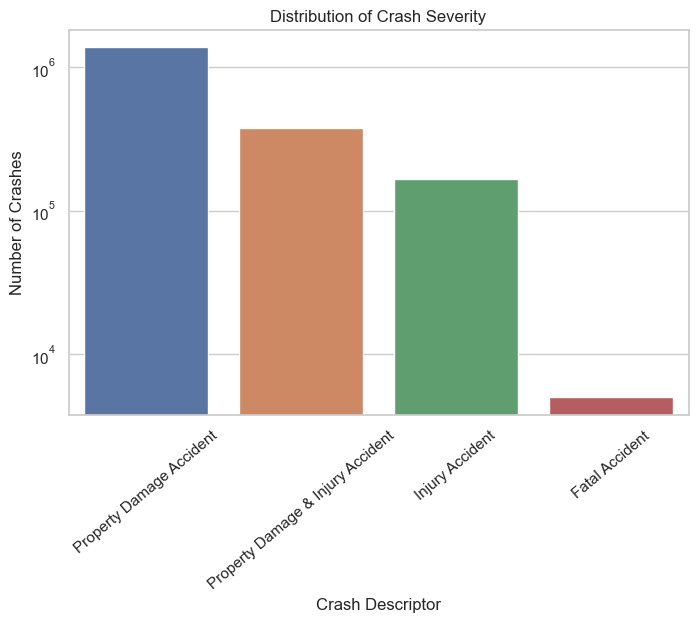

In [5]:
#Step 1: Distribution by accident type(Crash Descriptor)
# Set seaborn style for plots
sns.set(style="whitegrid")

#Distribution by accident type(Crash Descriptor)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Crash Descriptor', order=df['Crash Descriptor'].value_counts().index)
plt.yscale('log')
plt.title('Distribution of Crash Severity')
plt.xlabel('Crash Descriptor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=40)
plt.show()

#Conclusion:
#The diagram shows us Distribution by accident type(Crash Descriptor)
#Most of the registered accidents are accidents involving only property damage.
#Accidents with injuries are less common, and fatal accidents are much less common.



<Figure size 1200x500 with 0 Axes>

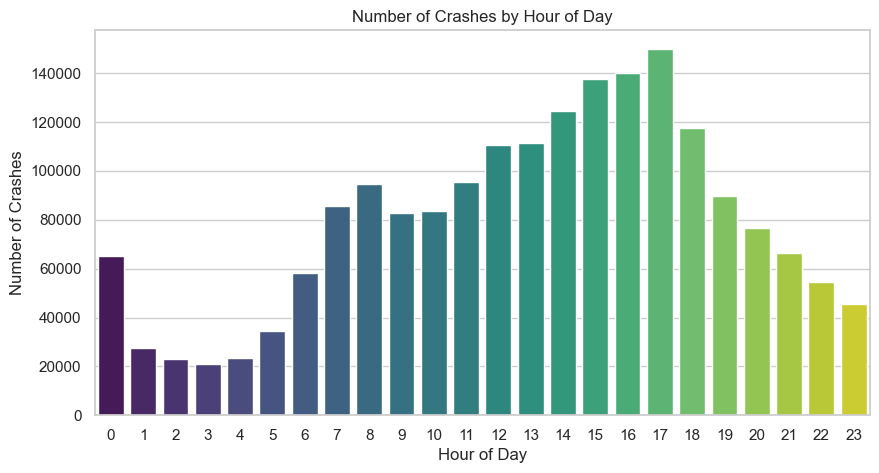

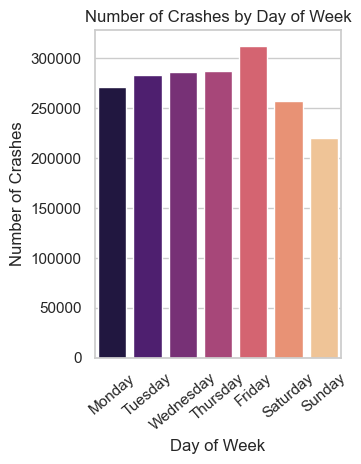

In [6]:
#Step 2: Distribution of accidents by time of day(Hour and Day of the week)
plt.figure(figsize=(12,5))
#Distribution of accidents by time of day(Hour and Day of the week)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Number of Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.show()

#Schedule by day of the week
plt.subplot(1, 2, 2)
#For the order of the days of the week:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Day of Week', order=order, palette='magma')
plt.title('Number of Crashes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

#Conclusion:
#The diagram shows us Distribution of accidents by time of day(Hour and Day of the week).
#Most of the registered accidents are at 16:00 hour of day.
#Most of the registered accidents in Day of the Weeks show Friday.

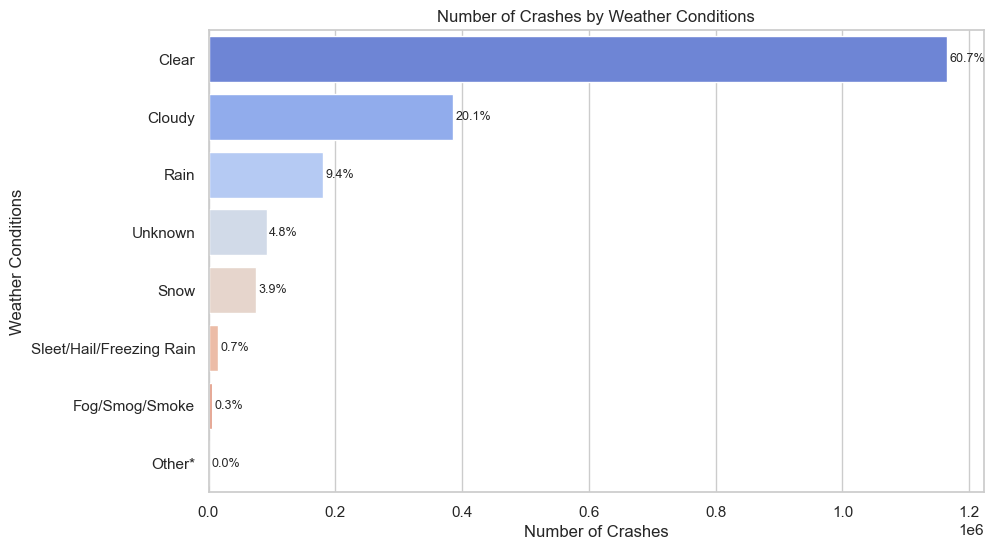

In [7]:
#Step 3: Distribution of accidents by weather conditions(Weather Conditions)
# Weather Conditions accidents 
#'Unknown' means missing information on this feature
plt.figure(figsize=(10,6))
weather_order = df['Weather Conditions'].value_counts().index
ax = sns.countplot(data=df, y='Weather Conditions', order=weather_order, palette='coolwarm')
plt.title('Number of Crashes by Weather Conditions')
total = len(df)
#Add the percentages to the chart
for patch in ax.patches:
    count = patch.get_width()
    percent = 100 * count / total
    ax.text(count + total * 0.002, patch.get_y() + patch.get_height() / 2,
            f'{percent:.1f}%', va='center', fontsize=9)
plt.xlabel('Number of Crashes')
plt.ylabel('Weather Conditions')
plt.show()

#Conclusion:
#The diagram shows us Distribution of accidents by weather conditions.
#Most of the registered accidents are When weather Clear.
#Show the least when the weather is Fog/Smog/Smoke.

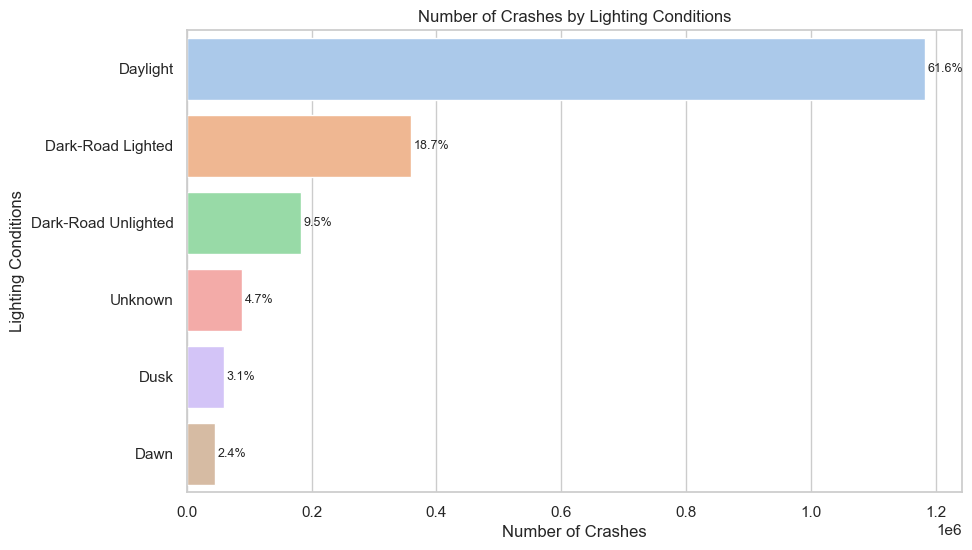

In [8]:
#Step 4:Distribution of accidents by lighting conditions(Lighting Conditions)

#Lighting Conditions accidents
#'Unknown' means missing information on this feature
plt.figure(figsize=(10,6))
lighting_order = df['Lighting Conditions'].value_counts().index
ax = sns.countplot(data=df, y='Lighting Conditions', order=lighting_order, palette='pastel')
plt.title('Number of Crashes by Lighting Conditions')
total = len(df)
#add the percentages to the chart
for patch in ax.patches:
    count = patch.get_width()
    percent = 100 * count / total
    ax.text(count + total * 0.002, patch.get_y() + patch.get_height() / 2,
            f'{percent:.1f}%', va='center', fontsize=9)
plt.xlabel('Number of Crashes')
plt.ylabel('Lighting Conditions')
plt.show()

#Conclusion:
#The diagram shows us Distribution of accidents by lighting conditions.
#Most of the registered accidents are when Daylight.
#Show the least when lighting condition Dawn.

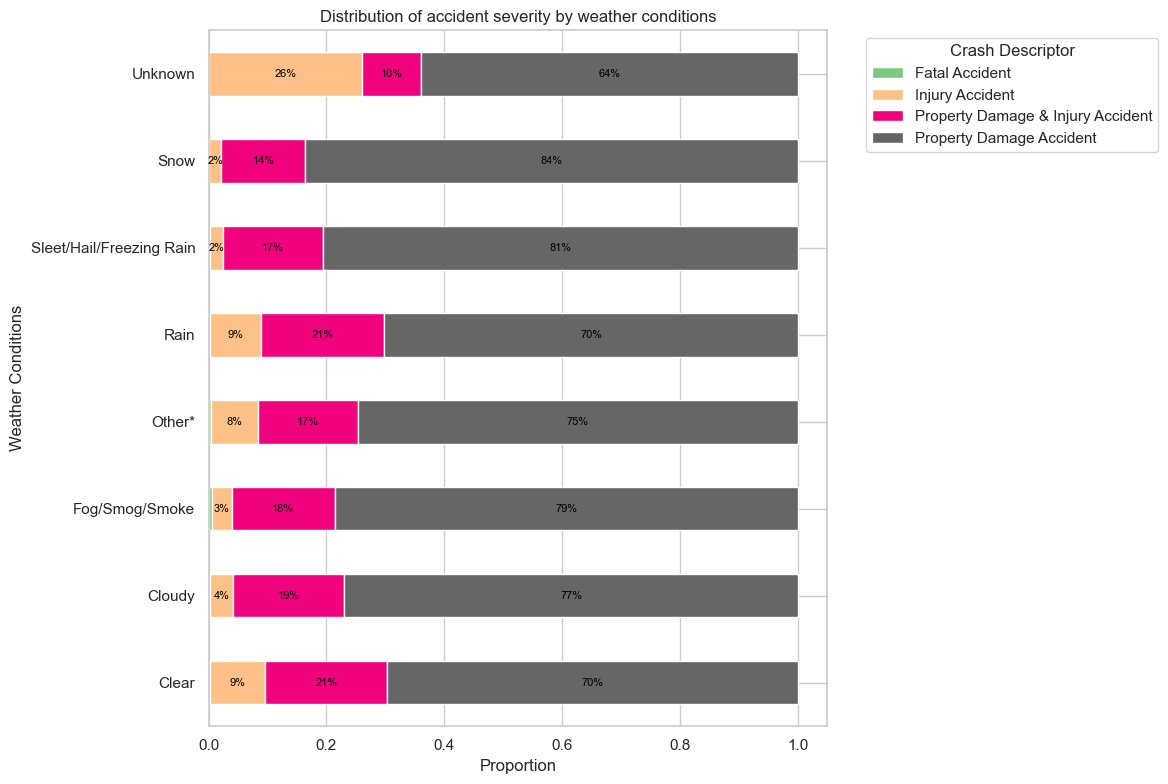

In [9]:
#Step 5:Distribution of accident severity depending on the weather

# Distribution of accident severity by weather conditions
weather_severity = pd.crosstab(df['Weather Conditions'], df['Crash Descriptor'], normalize='index')
ax=weather_severity.plot(kind='barh', stacked=True, figsize=(12,8), colormap='Accent')
plt.title('Distribution of accident severity by weather conditions')
plt.xlabel('Proportion')
plt.ylabel('Weather Conditions')
plt.legend(title='Crash Descriptor', bbox_to_anchor=(1.05, 1), loc='upper left')
for i, (index, row) in enumerate(weather_severity.iterrows()):
    cumulative = 0
    for val in row.values:
        if val > 0.02:
            ax.text(cumulative + val / 2, i, f"{val * 100:.0f}%", va='center', ha='center', fontsize=8, color='black')
        cumulative += val
plt.tight_layout()
plt.show()

#Conclusion:
#The diagram shows us Distribution of accident severity depending on the weather.
#In most weather conditions, accidents without injuries prevail.

In [10]:
#Step 6:Distribution of accident severity depending  Lighting Conditions

#Distribution of accident severity by Lighting Conditions
lighting_categories = df['Lighting Conditions'].dropna().unique()

for lighting in lighting_categories:
# Filtering by type of lighting
    subset = df[df['Lighting Conditions'] == lighting]
    counts = subset['Crash Descriptor'].value_counts(normalize=True) * 100 
# Rounding and sorting
    counts = counts.round(2).sort_values(ascending=False)
# Output
    print(f"\nCrash Severity distribution in '{lighting}':")
    for label, value in counts.items():
        print(f"- {label}: {value:.1f}%")
        
#Conclusion:
#The most dangerous conditions are a dark unlit road: there is the highest proportion of serious accidents (13.8% involving victims).
#There are also more injuries and deaths when illuminated at night and at dusk than during the day.
#There are more accidents during the day, but they are more often uninjured.
#At dawn and at night (Dark-Road Lighted), the injury rate is lower than in total darkness.
#There are a lot of injuries in Unknown lighting (almost 26%), but this may be due to incomplete data.


Crash Severity distribution in 'Dark-Road Unlighted':
- Property Damage Accident: 86.3%
- Property Damage & Injury Accident: 12.2%
- Injury Accident: 1.1%
- Fatal Accident: 0.5%

Crash Severity distribution in 'Daylight':
- Property Damage Accident: 71.4%
- Property Damage & Injury Accident: 20.5%
- Injury Accident: 7.9%
- Fatal Accident: 0.2%

Crash Severity distribution in 'Dark-Road Lighted':
- Property Damage Accident: 65.7%
- Property Damage & Injury Accident: 23.1%
- Injury Accident: 10.7%
- Fatal Accident: 0.4%

Crash Severity distribution in 'Dusk':
- Property Damage Accident: 70.2%
- Property Damage & Injury Accident: 18.9%
- Injury Accident: 10.6%
- Fatal Accident: 0.3%

Crash Severity distribution in 'Dawn':
- Property Damage Accident: 76.4%
- Property Damage & Injury Accident: 16.1%
- Injury Accident: 7.3%
- Fatal Accident: 0.2%

Crash Severity distribution in 'Unknown':
- Property Damage Accident: 64.6%
- Injury Accident: 25.7%
- Property Damage & Injury Accident: 9.7%
- 

In [11]:
#Step 7:Number of Vehicles Involved and comparison by accident type
# Clean data
df_clean = df[df['Number of Vehicles Involved'].notna()]
df_clean = df_clean[df_clean['Number of Vehicles Involved'] > 0]

# Calculate statistics
total = len(df_clean)
mean_vehicles = df_clean['Number of Vehicles Involved'].mean()
one_vehicle = (df_clean['Number of Vehicles Involved'] == 1).sum() / total * 100
two_vehicles = (df_clean['Number of Vehicles Involved'] == 2).sum() / total * 100
three_plus_vehicles = (df_clean['Number of Vehicles Involved'] >= 3).sum() / total * 100

# Print results
print("Vehicle Involvement Statistics:\n")
print(f"Total crash records: {total:,}")
print(f"Average number of vehicles per crash: {mean_vehicles:.2f}")
print(f"Crashes with 1 vehicle: {one_vehicle:.1f}%")
print(f"Crashes with 2 vehicles: {two_vehicles:.1f}%")
print(f"Crashes with 3 or more vehicles: {three_plus_vehicles:.1f}%")

#We group them by Crash Descriptor and calculate the average, median and maximum
crash_summary = df.groupby('Crash Descriptor')['Number of Vehicles Involved'].agg(['count', 'mean', 'median', 'max']).round(2)
crash_summary = crash_summary.rename(columns={
    'count': 'Total Crashes',
    'mean': 'Avg Vehicles',
    'median': 'Median',
    'max': 'Max Vehicles'
})

print("Number of Vehicles Involved by Crash Type:\n")
print(crash_summary)

#Conclusion:
#On average, each crash involves around 1.8 vehicles.
#Most crashes with 2 vehicles = 65%.
#Most Total Crashes in Crash Descriptor it is Property Damage Accident 1372584 vehicles.
#Fatal Accidentsusually involve fewer vehicles — often just one.

Vehicle Involvement Statistics:

Total crash records: 1,918,715
Average number of vehicles per crash: 1.79
Crashes with 1 vehicle: 28.6%
Crashes with 2 vehicles: 65.0%
Crashes with 3 or more vehicles: 6.4%
Number of Vehicles Involved by Crash Type:

                                   Total Crashes  Avg Vehicles  Median  Max Vehicles
Crash Descriptor                                                                    
Fatal Accident                              5008          1.54     1.0            14
Injury Accident                           166105          1.53     1.0            20
Property Damage & Injury Accident         375018          1.97     2.0            25
Property Damage Accident                 1372584          1.78     2.0            40


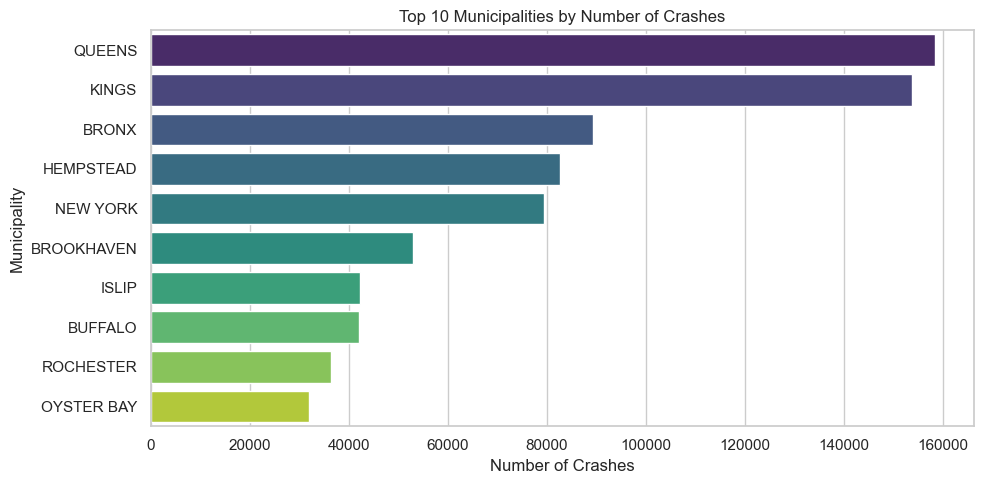

In [27]:
#Step 8:Distribution of accidents by Municipality (Top 10 by crash count)
#Top 10 by crash count
plt.figure(figsize=(10, 5))
top_muni = df['Municipality'].value_counts().nlargest(10)
sns.barplot(x=top_muni.values, y=top_muni.index, palette="viridis")
plt.title("Top 10 Municipalities by Number of Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()

#Conclusion:
#Here we see QEENS Municipality has more crash accidents then others
#The lowes car crash in Oyster Bay Municipality

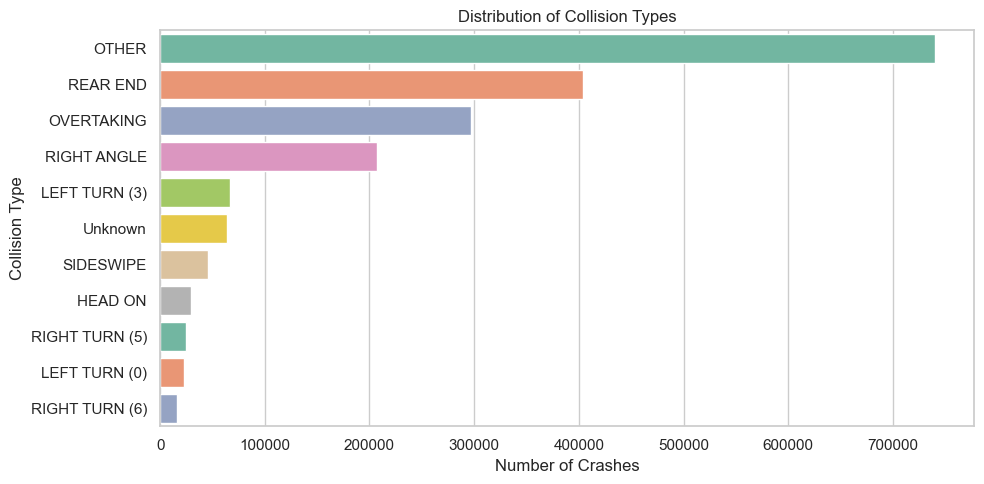

In [28]:
#Step 9:Distribution of accidents by Collision Type Descriptor
#Collision Type Descriptor
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Collision Type Descriptor', order=df['Collision Type Descriptor'].value_counts().index, palette="Set2")
plt.title("Distribution of Collision Types")
plt.xlabel("Number of Crashes")
plt.ylabel("Collision Type")
plt.tight_layout()
plt.show()

#Conclusion:
#The most common types of collisions are OTHER and REAR END.
#Also common are: OVERTAKING and RIGHT ANGLE.

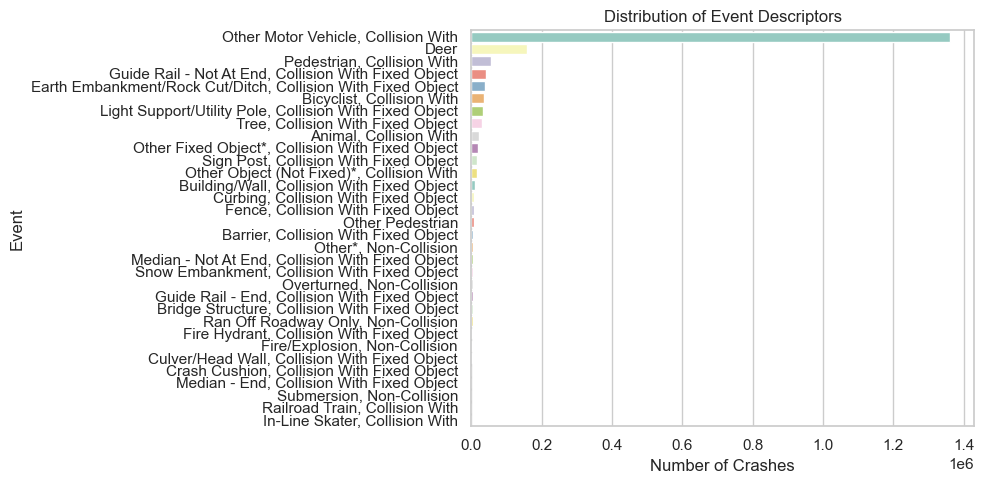

In [32]:
#Step 10:Distribution of accidents by Event Descriptor

#Event Descriptor
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Event Descriptor', order=df['Event Descriptor'].value_counts().index, palette="Set3")
plt.title("Distribution of Event Descriptors")
plt.xlabel("Number of Crashes")
plt.ylabel("Event")
plt.tight_layout()
plt.show()

#Conclusion:
#Almost all accidents are collisions with other vehicles.
#The second most popular is collisions with animals (mostly deer) and pedestrians.
#Other events (crashing into pillars, coups, fire) are rare.

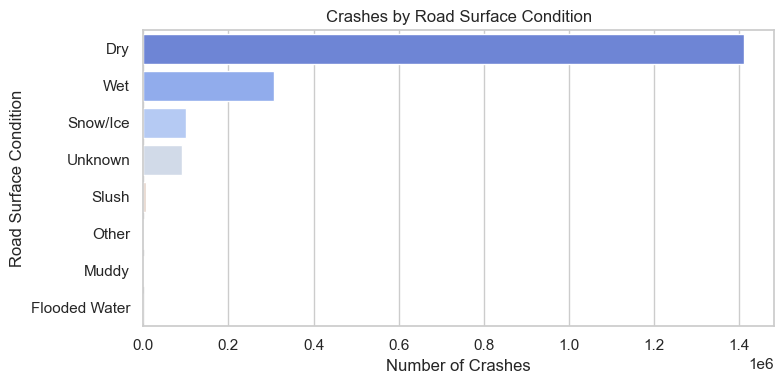

In [33]:
#Step 11:Distribution of accidents by Road Surface Conditions

#Road Surface Conditions
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Road Surface Conditions', order=df['Road Surface Conditions'].value_counts().index, palette="coolwarm")
plt.title("Crashes by Road Surface Condition")
plt.xlabel("Number of Crashes")
plt.ylabel("Road Surface Condition")
plt.tight_layout()
plt.show()

#Conclusion:
#More than 70% of all accidents occur on dry surfaces.
#Wet and Snow/Ice are much less common, but they cannot be ignored.
#There are very few accidents on mud, ice and water.

In [63]:
## Next Steps will be Model Implementation,trained and Evaluation & Results
#Predict the severity of an accident (Crash Descriptor) based on the accident conditions.
#We will simplify the task to binary classification like 0 and 1 
#It means incidents like Fatal,Injury,Property Damage & Injury Accidents will be 1 
#Property Damage Accident will be 0
#For simplify  because if we use 0,1,2,3 for this accidents it will be multiclass classification and give bad Evaluation & Results
# Also,give bad Complicating the model and makes it difficult for trained
# In short,combining all types of injury-related crashes into a single class (1) makes the prediction problem more stable, realistic, and easier to evaluate at this stage.

In [12]:
#Step 1: Preparing the target variable and prepairing features
df['Severity_Binary'] = df['Crash Descriptor'].apply(
    lambda x: 0 if x == 'Property Damage Accident' else 1
)

# Сheck for all the necessary features in the dataset.
selected_features = [
    'Day of Week',
    'Lighting Conditions',
    'Collision Type Descriptor',
    'Road Descriptor',
    'Weather Conditions',
    'Road Surface Conditions',
    'Event Descriptor',
    'Number of Vehicles Involved',
    'Severity_Binary'
]

#Filter the dataframe by these criteria, removing lines with omissions.
df_model = df[selected_features].dropna()

#Normalization of a numeric attribute
df_model['Vehicles_norm'] = (df_model['Number of Vehicles Involved'] - df_model['Number of Vehicles Involved'].mean()) / df_model['Number of Vehicles Involved'].std()

# Кодируем день недели (как числовой признак)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_model['DayIndex'] = df_model['Day of Week'].apply(lambda x: days_order.index(x) if x in days_order else -1)
df_model = df_model[df_model['DayIndex'] >= 0]
df_model['Day_norm'] = (df_model['DayIndex'] - df_model['DayIndex'].mean()) / df_model['DayIndex'].std()

# One-hot encoding всех категориальных признаков
categorical_cols = [
    'Lighting Conditions',
    'Collision Type Descriptor',
    'Road Descriptor',
    'Weather Conditions',
    'Road Surface Conditions',
    'Event Descriptor'
]
encoded = pd.get_dummies(df_model[categorical_cols], drop_first=True)

#Collect the final X and y
X = pd.concat([df_model[['Vehicles_norm', 'Day_norm']], encoded], axis=1).values
y = df_model['Severity_Binary'].values.reshape(-1, 1)

# Bias
X = np.hstack([np.ones((X.shape[0], 1)), X])

#Train-test split
np.random.seed(42)
shuffle_indices = np.random.permutation(X.shape[0])
split_idx = int(0.8 * X.shape[0])
train_idx, test_idx = shuffle_indices[:split_idx], shuffle_indices[split_idx:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

#Output the dimensions
X.shape, X_train.shape, y_train.shape


((1918715, 69), (1534972, 69), (1534972, 1))

In [13]:
#Step 2: Training and Prediction
from sklearn.ensemble import RandomForestClassifier

# Training
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train.ravel())

# Prediction
y_pred_forest = forest.predict(X_test)

In [14]:
#Step 3:Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

def print_metrics(model_name, metrics):
    accuracy, precision, recall, f1 = metrics
    print(f"\n{model_name} Metrics:")
    print(f" Accuracy : {accuracy * 100:.2f}%")
    print(f" Precision: {precision * 100:.2f}%")
    print(f" Recall   : {recall * 100:.2f}%")
    print(f" F1-Score : {f1 * 100:.2f}%")

# Вызов для Random Forest:
metrics_forest = evaluate_model(y_test, y_pred_forest)
print_metrics("Random Forest", metrics_forest)

#For improving recall we can use class_weight='balanced' it balanced 0 and 1 predictions 
#And if recall will improve it will be do  less mistakes with hard accidents but Accuracy and Precision go down as a percentage


Random Forest Metrics:
 Accuracy : 76.60%
 Precision: 84.56%
 Recall   : 27.27%
 F1-Score : 41.24%


In [43]:
#Step 4:Predictions Test 
print("\nRandom Sample Predictions:")
n = 10  # how many examples to show
random_indices = np.random.choice(len(y_test), size=n, replace=False)

for i in random_indices:
    actual = y_test[i]
    predicted = y_pred_forest[i]
    emoji = "+" if actual == predicted else "-"
    print(f"{emoji} Actual: {actual} → Predicted: {predicted}")


Random Sample Predictions:
+ Actual: [0] → Predicted: 0
+ Actual: [0] → Predicted: 0
+ Actual: [0] → Predicted: 0
+ Actual: [1] → Predicted: 1
- Actual: [0] → Predicted: 1
+ Actual: [0] → Predicted: 0
+ Actual: [0] → Predicted: 0
+ Actual: [0] → Predicted: 0
+ Actual: [1] → Predicted: 1
+ Actual: [0] → Predicted: 0
